In [33]:
from keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = np.loadtxt("OBD_sensors_new.csv",delimiter=",")

In [35]:
data.shape

(8865, 4)

In [36]:
type(data)

numpy.ndarray

In [37]:
x = data[:,0:3]
y = data[:,3]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print(x.shape)
print(y.shape)

(8865, 3)
(8865,)


In [40]:
print(x_train.shape)
print(x_test.shape)
print(x_train.shape[0])
print(x_train.shape[1])

(6205, 3)
(2660, 3)
6205
3


In [41]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

In [42]:
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [43]:
y_test

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [44]:
print(y_train.shape)
print(y_test.shape)

(6205, 8, 8)
(2660, 8, 8)


# Creating the model

In [47]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1,3), activation='relu', input_shape=x_train.shape[1]))
model.add(Conv2D(filters=32, kernel_size=(1,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(1, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(1, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(8, activation='softmax'))

TypeError: 'int' object is not iterable

# Compiling and Training the model 

In [124]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [125]:
learning_rate = 0.0001

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
epochs = 30
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/30
194/194 [==============================] - 1s 4ms/step - loss: 14.5659 - accuracy: 0.0965 - val_loss: 5.4681 - val_accuracy: 0.0560
Epoch 2/30
194/194 [==============================] - 0s 1ms/step - loss: 10.3554 - accuracy: 0.1302 - val_loss: 3.8688 - val_accuracy: 0.0718
Epoch 3/30
194/194 [==============================] - 0s 1ms/step - loss: 8.2750 - accuracy: 0.2440 - val_loss: 3.0541 - val_accuracy: 0.5974
Epoch 4/30
194/194 [==============================] - 0s 1ms/step - loss: 7.0375 - accuracy: 0.3199 - val_loss: 2.4841 - val_accuracy: 0.5974
Epoch 5/30
194/194 [==============================] - 0s 1ms/step - loss: 5.8825 - accuracy: 0.3431 - val_loss: 2.1674 - val_accuracy: 0.5974
Epoch 6/30
194/194 [==============================] - 0s 1ms/step - loss: 5.1073 - accuracy: 0.3563 - val_loss: 1.9996 - val_accuracy: 0.5974
Epoch 7/30
194/194 [==============================] - 0s 1ms/step - loss: 4.2827 - accuracy: 0.3797 - val_loss: 1.8929 - val_accuracy: 0.5974
Epoc

# Plotting graphs for accuracy 

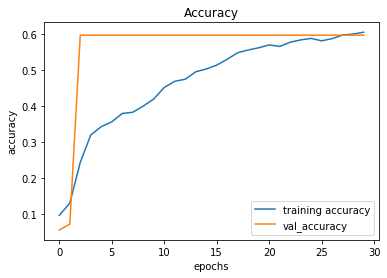

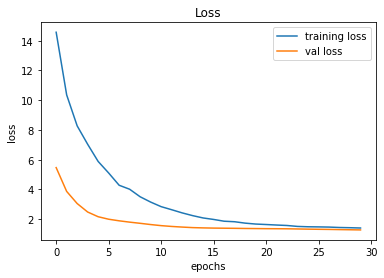

In [126]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [127]:
model.save('model.h5')

In [128]:
from keras.models import load_model

model = load_model('model.h5')

In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_12 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 32        
_________________________________________________________________
dropout_13 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_14 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                

In [140]:
pred_train = model.predict_classes(x_train)
count = 0
for i in pred_train:
    if (i==0) :
        print(i)
        count = count+1
        
print(count)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [168]:
label=np.array(y_train)
print(label.shape)

(6205, 8)


In [141]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")
print(pred_test.reshape(1,2660))
print(label)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [142]:
for i in pred_test:
    if i != 0 :
        print(i)

In [77]:
#model.save('anomaly_model.h5')

# Loading the model

In [78]:
#from keras.models import load_model

In [79]:
#model = load_model('anomaly_model.h5')

In [163]:
# Trying with real world input
samples = np.array([[data[28][0:3]]])      #([  [   ],[   ]  ])
samples

array([[[85.        ,  2.8900001 , 15.68627453]]])

In [164]:
prediction = model.predict_classes(samples)
prediction

array([[0]], dtype=int64)

In [165]:
pred = model.predict(samples)
pred

array([[[0.62849   , 0.13261527, 0.03281324, 0.02093462, 0.10347261,
         0.00749975, 0.03201816, 0.04215639]]], dtype=float32)